# Sentiment Analysis
---

## NLTK Vader Library - (Valence Aware Dictionary and sEntiment Reasoner)
#### Vader Metrics:

- **Compound Score** (compound): Normalized, weighted composite score that ranges from -1 (most negative) to +1 (most positive). It represents the overall sentiment of the text.
- **Negative Score** (neg): The proportion of the text that is identified as having a negative sentiment.
- **Neutral Score** (neu): The proportion of the text that is identified as having a neutral sentiment.
- **Positive Score** (pos): The proportion of the text that is identified as having a positive sentiment.
#### Definitions obtained at : https://medium.com/@yrpoddar/python-libraries-for-sentiment-analysis-a-study-on-what-to-choose-52fb26860a77

## Movie Reviews Analysis

#### Read in the **movies.csv** file

In [50]:
import pandas as pd

movie_df = pd.read_csv('../Resources/movies.csv')
movie_df = movie_df.drop(columns=['Unnamed: 0']) 
movie_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_History,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,False,False,False,False,False,False,False,False,False
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,False,False,False,False,True,False,False,False,False
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,False,False,False,False,False,False,True,False,False
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              6123 non-null   int64  
 1   overview              6123 non-null   object 
 2   popularity            6123 non-null   float64
 3   release_date          6123 non-null   object 
 4   title                 6123 non-null   object 
 5   vote_average          6123 non-null   float64
 6   vote_count            6123 non-null   int64  
 7   cleaned_reviews       6123 non-null   object 
 8   type_Action           6123 non-null   bool   
 9   type_Adventure        6123 non-null   bool   
 10  type_Animation        6123 non-null   bool   
 11  type_Comedy           6123 non-null   bool   
 12  type_Crime            6123 non-null   bool   
 13  type_Documentary      6123 non-null   bool   
 14  type_Drama            6123 non-null   bool   
 15  type_Family          

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # Vader
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
plt.style.use('ggplot')

In [53]:
# Initialize SIA
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('Greatest film of all time!')

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [54]:
# Brief testing
sia.polarity_scores('Poor writing and terrible acting.')

{'neg': 0.674, 'neu': 0.326, 'pos': 0.0, 'compound': -0.7351}

In [55]:
# Brief testing
example = movie_df['cleaned_reviews'][25]
print(example)

girl exceptional movie shows two people crossing line leads inappropriate behavior devastating consequences movie extremely complex characters wonderfully written plot beautiful cinematography great music keeps trying figure whether characters good bad love dialogue characters writerdirector lets audience decide feel characters behavior many scenes left unanswered audience decide think happens meaning behind final scene highly recommend movie


In [56]:
# Brief testing
sia.polarity_scores(example)

{'neg': 0.1, 'neu': 0.617, 'pos': 0.283, 'compound': 0.9355}

In [57]:
# Sentiment
res = {}
for i, row in tqdm(movie_df.iterrows(), total=len(movie_df)):
    text = row['cleaned_reviews']
    movie_id = row['movie_id']
    res[movie_id] = sia.polarity_scores(text)

C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tpete\anaconda3\envs\dev\lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.com

  0%|          | 0/6123 [00:00<?, ?it/s]

In [58]:
# Look at type of the cleaned_reviews column
print(type(res))

<class 'dict'>


In [59]:
# More or less what is happening in the # Sentiment block above
def get_sentiment_scores(review):
    sentiment_scores = sia.polarity_scores(review)
    return pd.Series(sentiment_scores)

In [60]:
# Apply the function 
reviews_sentiment_scores_df = movie_df['cleaned_reviews'].apply(get_sentiment_scores)

In [61]:
# Combine and create new columns for the sentiment scores
review_sentiment_movie_df = pd.concat([movie_df, reviews_sentiment_scores_df], axis=1)
review_sentiment_movie_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,neg,neu,pos,compound
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,True,False,False,False,False,0.069,0.646,0.286,0.9995
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,False,False,False,False,False,0.253,0.542,0.205,-0.9793
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,True,False,False,False,False,0.111,0.716,0.173,0.9799
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,False,False,True,False,False,0.111,0.553,0.336,0.9616
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,False,False,False,False,False,0.104,0.679,0.217,0.9949


In [62]:
# Rename to specify that these are the scores for cleaned_reviews and not overviews
# This is to prevent confusion when merging dataframes later on
cols_to_prefix = ['neg', 'neu', 'pos', 'compound']

review_sentiment_movie_df = review_sentiment_movie_df.rename(columns={col: 'review_' + col for col in cols_to_prefix})
review_sentiment_movie_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,review_neg,review_neu,review_pos,review_compound
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,True,False,False,False,False,0.069,0.646,0.286,0.9995
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,False,False,False,False,False,0.253,0.542,0.205,-0.9793
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,True,False,False,False,False,0.111,0.716,0.173,0.9799
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,False,False,True,False,False,0.111,0.553,0.336,0.9616
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,False,False,False,False,False,0.104,0.679,0.217,0.9949


# Overview Analysis with VADER

## Step 1: Clean the overview column

In [63]:
import pandas as pd
import numpy as np
import re
from string import punctuation
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

In [64]:
# Clean up the overview column, stopwords, etc.

# Remove URLs from text string
def remove_urls(text, replacement_text="[URL REMOVED]"):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_urls = url_pattern.sub(replacement_text, text)
    return text_without_urls
# # Alternatively:
# def remove_urls(text):
#     # This regex matches URLs
#     url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#     return url_pattern.sub(r'', text)

In [65]:
# Useful code to have if there would be a benefit from the removal of specific phrases:

# def remove_specific_phrases(text):
#     phrase_pattern = re.compile(r'full spoiler-free review.*\[URL REMOVED\].*', re.IGNORECASE)
#     text_without_phrases = phrase_pattern.sub('', text)
#     return text_without_phrases

In [66]:
# Set function
def clean_doc(doc):
    doc = remove_urls(doc)
#     doc = remove_specific_phrases(doc)
    doc = doc.lower()
    table = str.maketrans('', '', punctuation)
    doc = doc.translate(table)
    tokens = doc.split()
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

movie_df['clean_overview'] = movie_df['overview'].apply(clean_doc)

In [67]:
# Tokenize 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movie_df['clean_overview'])
X = tokenizer.texts_to_matrix(movie_df['clean_overview'])

In [68]:
# Display beginning of df
movie_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,False,False,False,True,False,False,False,False,follow mythic journey paul atreides unites cha...
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,False,False,False,False,False,False,False,False,po gearing become spiritual leader valley peac...
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,False,False,False,True,False,False,False,False,following explosive showdown godzilla kong mus...
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,False,False,False,False,False,True,False,False,exufc fighter dalton takes job bouncer florida...
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,False,False,False,False,False,False,False,False,forced confront revelations past paramedic cas...


In [69]:
# Drop un-clean 'overview' column to only keep 'clean_overview'
movie_df = movie_df.drop(['overview'], axis=1)
movie_df.head()

,movie_id,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview
0,693134,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,False,...,False,False,False,False,True,False,False,False,False,follow mythic journey paul atreides unites cha...
1,1011985,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,True,...,False,False,False,False,False,False,False,False,False,po gearing become spiritual leader valley peac...
2,823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,False,...,False,False,False,False,True,False,False,False,False,following explosive showdown godzilla kong mus...
3,359410,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,False,...,False,False,False,False,False,False,True,False,False,exufc fighter dalton takes job bouncer florida...
4,634492,921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,False,...,False,False,False,False,False,False,False,False,False,forced confront revelations past paramedic cas...


## Step 2: Sentiment analysis of **clean_overview** column

In [70]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('Greatest film of all time!')

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [71]:
def get_sentiment_scores(overview):
    sentiment_scores = sia.polarity_scores(overview)
    return pd.Series(sentiment_scores)

In [72]:
overview_sentiment_scores_df = movie_df['clean_overview'].apply(get_sentiment_scores)

In [73]:
overview_sentiment_scores_df = pd.concat([movie_df, overview_sentiment_scores_df], axis=1)
overview_sentiment_scores_df.head()

,movie_id,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview,neg,neu,pos,compound
0,693134,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,False,...,True,False,False,False,False,follow mythic journey paul atreides unites cha...,0.269,0.583,0.147,-0.6597
1,1011985,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,True,...,False,False,False,False,False,po gearing become spiritual leader valley peac...,0.390,0.526,0.084,-0.9300
2,823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,False,...,True,False,False,False,False,following explosive showdown godzilla kong mus...,0.189,0.722,0.089,-0.4215
3,359410,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,False,...,False,False,True,False,False,exufc fighter dalton takes job bouncer florida...,0.000,0.633,0.367,0.7003
4,634492,921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,False,...,False,False,False,False,False,forced confront revelations past paramedic cas...,0.209,0.667,0.124,-0.2263


In [74]:
# Adding 'overview_' as a prefix to the newly created sentiment score columns
cols_to_prefix = ['neg', 'neu', 'pos', 'compound']

overview_sentiment_scores_df = overview_sentiment_scores_df.rename(columns={col: 'overview_' + col for col in cols_to_prefix})
overview_sentiment_scores_df.tail()

,movie_id,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview,overview_neg,overview_neu,overview_pos,overview_compound
6118,94073,1.451,7/9/1971,Southern Comforts,3.8,5,early saw genre film involved rural america co...,False,False,False,...,False,False,False,False,False,beauty contest staged barn lowiq dimwit called...,0.000,0.703,0.297,0.8225
6119,85600,1.451,1/30/1985,Blood Debts,3.8,12,blood debts macho man ripoff movie death wish ...,True,False,False,...,False,False,True,False,False,started rape daughter killing boyfriend takes ...,0.483,0.395,0.121,-0.9790
6120,30928,1.409,4/28/1987,Demon of Paradise,4.0,14,lizardman loose philippines er mean hawaii dyn...,False,False,False,...,False,False,True,False,False,hunters become hunted illegal dynamite disturb...,0.322,0.526,0.152,-0.7579
6121,81470,1.403,9/1/1977,The Guy From Harlem,3.0,17,film bad hard watch must watch rifftrax track ...,True,False,False,...,False,False,False,False,False,tough streetwise private investigator al conno...,0.270,0.670,0.060,-0.8442
6122,315379,1.402,11/12/1971,Paper Man,6.3,10,killing machine credit card mistakenly issued ...,False,False,False,...,True,True,True,False,False,prank starts group college students creating f...,0.195,0.588,0.217,-0.1280


---

#### The above code documents the sentiment analysis of the overview data we have for each movie.
# Team Note:
#### Another method of analysis may be better when working with the overviews.

---

# Formatting 'release_date' column to '%Y-%m-%d'
- Originally, half of the dataframe was in '%Y-%m-%d' format, while the other half was '%m/%d/%Y'.
### (Additionally) creating 'release_year' column to store only the year of each movie's release.

In [75]:
from datetime import datetime

DATE_FORMATS = ['%Y-%m-%d', '%m/%d/%Y']

def parse_date(date_str):
    for date_format in DATE_FORMATS:
        try:
            return datetime.strptime(date_str, date_format)
        except ValueError:
            pass
    # If none of the formats match, return None or handle the error as needed
    return None

# Apply the parse_date function to the 'release_date' column
movie_df['release_date'] = movie_df['release_date'].apply(parse_date)

# Convert the 'release_date' column to datetime format
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Extract the year from the 'release_date' column and create a new 'release_year' column
movie_df['release_year'] = movie_df['release_date'].dt.year
date_movie_df = movie_df

In [76]:
date_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              6123 non-null   int64         
 1   popularity            6123 non-null   float64       
 2   release_date          6123 non-null   datetime64[ns]
 3   title                 6123 non-null   object        
 4   vote_average          6123 non-null   float64       
 5   vote_count            6123 non-null   int64         
 6   cleaned_reviews       6123 non-null   object        
 7   type_Action           6123 non-null   bool          
 8   type_Adventure        6123 non-null   bool          
 9   type_Animation        6123 non-null   bool          
 10  type_Comedy           6123 non-null   bool          
 11  type_Crime            6123 non-null   bool          
 12  type_Documentary      6123 non-null   bool          
 13  type_Drama        

---
# Now, combine all three dataframes to contain our new columns.
---
## The newly added columns:
#### From '**review_sentiment_movie_df**':
- review_neg
- review_neu
- review_pos
- review_compound
#### From '**overview_sentiment_scores_df**':
- overview_neg
- overview_neu
- overview_pos
- overview_compund
#### From '**date_movie_df**':
- release_year
#### It shall also include the normalized date format in 'release_date' column.

In [77]:
# Merge the review_sentiment_movie_df & overview_sentiment_scores_df on common columns
merged_df = pd.merge(review_sentiment_movie_df, overview_sentiment_scores_df)
merged_df.head()

,movie_id,overview,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,...,type_Western,review_neg,review_neu,review_pos,review_compound,clean_overview,overview_neg,overview_neu,overview_pos,overview_compound
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,...,False,0.069,0.646,0.286,0.9995,follow mythic journey paul atreides unites cha...,0.269,0.583,0.147,-0.6597
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,...,False,0.253,0.542,0.205,-0.9793,po gearing become spiritual leader valley peac...,0.390,0.526,0.084,-0.9300
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,...,False,0.111,0.716,0.173,0.9799,following explosive showdown godzilla kong mus...,0.189,0.722,0.089,-0.4215
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,...,False,0.111,0.553,0.336,0.9616,exufc fighter dalton takes job bouncer florida...,0.000,0.633,0.367,0.7003
4,634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,...,False,0.104,0.679,0.217,0.9949,forced confront revelations past paramedic cas...,0.209,0.667,0.124,-0.2263


In [78]:
# To avoid conflict with the next merge, dropping 'release_date' will help, as this new dataframe has the incorrect formatting
merged_df = merged_df.drop(['release_date'], axis=1)
merged_df.head()

,movie_id,overview,popularity,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Western,review_neg,review_neu,review_pos,review_compound,clean_overview,overview_neg,overview_neu,overview_pos,overview_compound
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,False,...,False,0.069,0.646,0.286,0.9995,follow mythic journey paul atreides unites cha...,0.269,0.583,0.147,-0.6597
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,True,...,False,0.253,0.542,0.205,-0.9793,po gearing become spiritual leader valley peac...,0.390,0.526,0.084,-0.9300
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,False,...,False,0.111,0.716,0.173,0.9799,following explosive showdown godzilla kong mus...,0.189,0.722,0.089,-0.4215
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,False,...,False,0.111,0.553,0.336,0.9616,exufc fighter dalton takes job bouncer florida...,0.000,0.633,0.367,0.7003
4,634492,"Forced to confront revelations about her past,...",921.140,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,False,...,False,0.104,0.679,0.217,0.9949,forced confront revelations past paramedic cas...,0.209,0.667,0.124,-0.2263


In [79]:
# Merging the 'merged_df' created above with 'date_movie_df', so the 'release_year' column is added. 
merged_df = pd.merge(merged_df, date_movie_df)
merged_df.head()

,movie_id,overview,popularity,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,review_neu,review_pos,review_compound,clean_overview,overview_neg,overview_neu,overview_pos,overview_compound,release_date,release_year
0,693134,Follow the mythic journey of Paul Atreides as ...,4534.956,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,False,...,0.646,0.286,0.9995,follow mythic journey paul atreides unites cha...,0.269,0.583,0.147,-0.6597,2024-02-27,2024
1,1011985,Po is gearing up to become the spiritual leade...,3214.314,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,True,...,0.542,0.205,-0.9793,po gearing become spiritual leader valley peac...,0.390,0.526,0.084,-0.9300,2024-03-02,2024
2,823464,"Following their explosive showdown, Godzilla a...",2297.340,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,False,...,0.716,0.173,0.9799,following explosive showdown godzilla kong mus...,0.189,0.722,0.089,-0.4215,2024-03-27,2024
3,359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,False,...,0.553,0.336,0.9616,exufc fighter dalton takes job bouncer florida...,0.000,0.633,0.367,0.7003,2024-03-08,2024
4,634492,"Forced to confront revelations about her past,...",921.140,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,False,...,0.679,0.217,0.9949,forced confront revelations past paramedic cas...,0.209,0.667,0.124,-0.2263,2024-02-14,2024


In [80]:
# Finally, re-naming the dataframe, and dropping the now-unnecessary 'overview' column that has been cleaned up.
movie_sentiment_df = merged_df.drop(['overview'], axis=1)
movie_sentiment_df.tail()

,movie_id,popularity,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,review_neu,review_pos,review_compound,clean_overview,overview_neg,overview_neu,overview_pos,overview_compound,release_date,release_year
6556,94073,1.451,Southern Comforts,3.8,5,early saw genre film involved rural america co...,False,False,False,True,...,0.756,0.120,-0.0828,beauty contest staged barn lowiq dimwit called...,0.000,0.703,0.297,0.8225,1971-07-09,1971
6557,85600,1.451,Blood Debts,3.8,12,blood debts macho man ripoff movie death wish ...,True,False,False,False,...,0.574,0.271,0.9613,started rape daughter killing boyfriend takes ...,0.483,0.395,0.121,-0.9790,1985-01-30,1985
6558,30928,1.409,Demon of Paradise,4.0,14,lizardman loose philippines er mean hawaii dyn...,False,False,False,False,...,0.743,0.181,0.9403,hunters become hunted illegal dynamite disturb...,0.322,0.526,0.152,-0.7579,1987-04-28,1987
6559,81470,1.403,The Guy From Harlem,3.0,17,film bad hard watch must watch rifftrax track ...,True,False,False,False,...,0.506,0.184,-0.2500,tough streetwise private investigator al conno...,0.270,0.670,0.060,-0.8442,1977-09-01,1977
6560,315379,1.402,Paper Man,6.3,10,killing machine credit card mistakenly issued ...,False,False,False,False,...,0.699,0.170,0.7096,prank starts group college students creating f...,0.195,0.588,0.217,-0.1280,1971-11-12,1971


### Convert to csv

In [82]:
movie_sentiment_df.to_csv('C:/Users/tpete/happy-flix/Resources/sentiment_movies.csv')

# The DataFrame is now an updated version with the sentiment analysis of VADER

In [46]:
movie_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              7145 non-null   int64         
 1   popularity            7145 non-null   float64       
 2   title                 7145 non-null   object        
 3   vote_average          7145 non-null   float64       
 4   vote_count            7145 non-null   int64         
 5   cleaned_reviews       7145 non-null   object        
 6   type_Action           7145 non-null   bool          
 7   type_Adventure        7145 non-null   bool          
 8   type_Animation        7145 non-null   bool          
 9   type_Comedy           7145 non-null   bool          
 10  type_Crime            7145 non-null   bool          
 11  type_Documentary      7145 non-null   bool          
 12  type_Drama            7145 non-null   bool          
 13  type_Family       

---

# Working with Genres
# Team Note: The popularity metric used in our dataframe needs to be normalized

---

In [29]:
import pandas as pd

# Melt the DataFrame to long format
melted_df = movie_df.melt(id_vars=['movie_id', 'popularity', 'release_year'], 
                           value_vars=['type_Action', 'type_Adventure', 'type_Animation', 'type_Comedy', 'type_Crime',
                                      'type_Documentary', 'type_Drama', 'type_Family', 'type_Fantasy', 'type_History',
                                      'type_Horror', 'type_Music', 'type_Mystery', 'type_Romance', 'type_Science Fiction',
                                      'type_TV Movie', 'type_Thriller', 'type_War', 'type_Western'], 
                           var_name='Genre', value_name='Is_Genre')

# Filter rows where the movie belongs to the genre
genre_movies = melted_df[melted_df['Is_Genre'] == True]

# Group by 'Genre' and 'release_year', then calc. the average popularity
# genre_popularity_by_year contains the average popularity for each genre per year
genre_popularity_by_year = genre_movies.groupby(['Genre', 'release_year'])['popularity'].mean().reset_index()

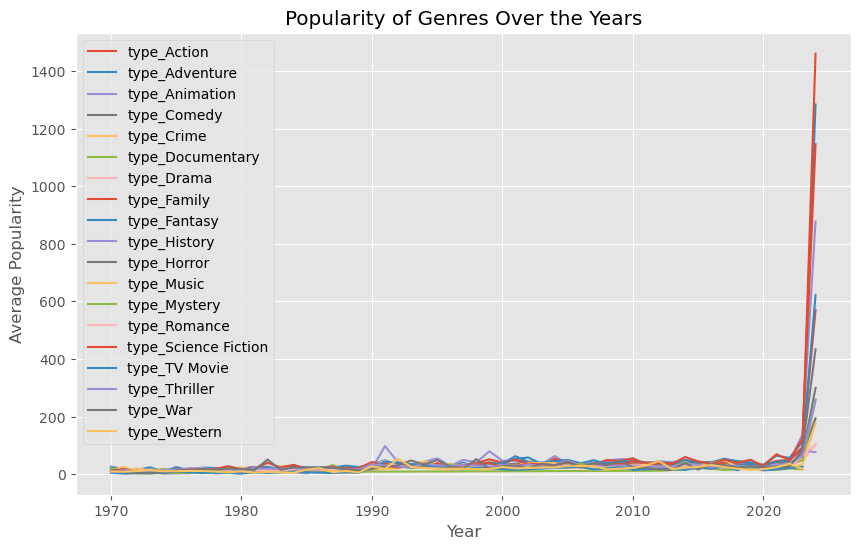

In [30]:
import matplotlib.pyplot as plt

genres = genre_popularity_by_year['Genre'].unique()

fig, ax = plt.subplots(figsize=(10, 6))

for genre in genres:
    genre_data = genre_popularity_by_year[genre_popularity_by_year['Genre'] == genre]
    ax.plot(genre_data['release_year'], genre_data['popularity'], label=genre)

ax.set_title('Popularity of Genres Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average Popularity')
ax.legend()

plt.show()

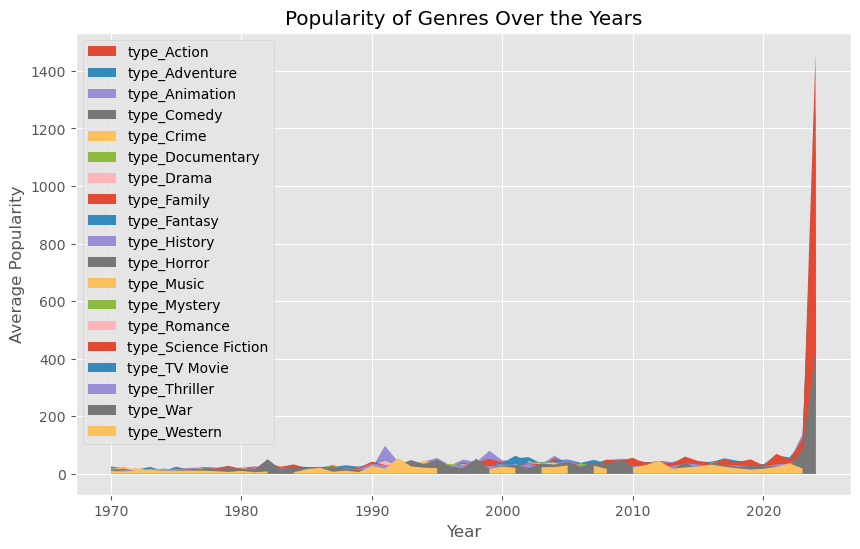

In [31]:
import numpy as np

# Pivot the DataFrame to have years as columns and genres as rows
pivot_df = genre_popularity_by_year.pivot(index='Genre', columns='release_year', values='popularity')

# Create area plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each genre
for genre in pivot_df.index:
    ax.fill_between(pivot_df.columns, pivot_df.loc[genre], label=genre)

ax.set_title('Popularity of Genres Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average Popularity')
ax.legend(loc='upper left')

plt.show()

---
# **Experimental**: Statistical Analysis
---

In [32]:
import pandas as pd

# Convert the 'release_date' column to datetime format
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Extract the year from the 'release_date' column and create a new 'release_year' column
movie_df['release_year'] = pd.DatetimeIndex(movie_df['release_date']).year
movie_df.head()

,movie_id,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview,release_year
0,693134,4534.956,2024-02-27,Dune: Part Two,8.311,2707,dune part two surpasses even highest expectati...,False,True,False,...,False,False,False,True,False,False,False,False,follow mythic journey paul atreides unites cha...,2024
1,1011985,3214.314,2024-03-02,Kung Fu Panda 4,7.066,897,kung fu panda best kung fu panda film even bes...,True,True,True,...,False,False,False,False,False,False,False,False,po gearing become spiritual leader valley peac...,2024
2,823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,6.700,575,godzilla kong new empire version previous inst...,True,True,False,...,False,False,False,True,False,False,False,False,following explosive showdown godzilla kong mus...,2024
3,359410,1134.726,2024-03-08,Road House,7.066,1379,poor scenario story add ending also convincing...,True,False,False,...,False,False,False,False,False,True,False,False,exufc fighter dalton takes job bouncer florida...,2024
4,634492,921.140,2024-02-14,Madame Web,5.676,1046,start heavily pregnant woman deep peruvian jun...,True,False,False,...,False,False,False,False,False,False,False,False,forced confront revelations past paramedic cas...,2024


In [33]:
movie_df.tail()

,movie_id,popularity,release_date,title,vote_average,vote_count,cleaned_reviews,type_Action,type_Adventure,type_Animation,...,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overview,release_year
6118,94073,1.451,1971-07-09,Southern Comforts,3.8,5,early saw genre film involved rural america co...,False,False,False,...,False,False,False,False,False,False,False,False,beauty contest staged barn lowiq dimwit called...,1971
6119,85600,1.451,1985-01-30,Blood Debts,3.8,12,blood debts macho man ripoff movie death wish ...,True,False,False,...,False,False,False,False,False,True,False,False,started rape daughter killing boyfriend takes ...,1985
6120,30928,1.409,1987-04-28,Demon of Paradise,4.0,14,lizardman loose philippines er mean hawaii dyn...,False,False,False,...,False,False,False,False,False,True,False,False,hunters become hunted illegal dynamite disturb...,1987
6121,81470,1.403,1977-09-01,The Guy From Harlem,3.0,17,film bad hard watch must watch rifftrax track ...,True,False,False,...,False,False,False,False,False,False,False,False,tough streetwise private investigator al conno...,1977
6122,315379,1.402,1971-11-12,Paper Man,6.3,10,killing machine credit card mistakenly issued ...,False,False,False,...,False,True,False,True,True,True,False,False,prank starts group college students creating f...,1971


# **Experimental**: Topic Modeling

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    result = []
    for token in word_tokenize(text):
        token = token.lower()
        if token not in stop_words and token.isalpha():
            result.append(token)
    return result

# Apply preprocessing to the 'cleaned_reviews' column
processed_docs = movie_df['clean_overview'].map(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tpete\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Convert corpus into Document Term Matrix using the dictionary above
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [36]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                       id2word=dictionary,
                       num_topics=10, 
                       random_state=100,
                       update_every=1,
                       chunksize=100,
                       passes=10,
                       alpha='auto',
                       per_word_topics=True)


In [37]:
# !pip install pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.425165 -0.100175       1        1  34.651178
1      0.058999  0.406259       2        1  15.863636
4     -0.041716 -0.039766       3        1  11.453672
2     -0.044446 -0.035822       4        1  10.428081
8     -0.049818 -0.034517       5        1   8.442934
0     -0.063058 -0.038694       6        1   6.698101
9     -0.070832 -0.040041       7        1   4.043660
6     -0.071644 -0.040230       8        1   3.742884
3     -0.071902 -0.038873       9        1   2.630848
7     -0.070747 -0.038139      10        1   2.045005, topic_info=         Term        Freq       Total Category  logprob  loglift
929      town  544.000000  544.000000  Default  30.0000  30.0000
380       two  679.000000  679.000000  Default  29.0000  29.0000
165       man  528.000000  528.000000  Default  28.0000  28.0000
95      young  931.000000  931.000000  Default  27.0000  27.0000
258       one  878.000000  878.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
6641   native   20.565831   21.449019  Topic10  -5.0512   3.8477
1010    board   17.424297   18.307252  Topic10  -5.2170   3.8403
1031  soldier   15.941578   16.824456  Topic10  -5.3059   3.8359
1365     rule   15.832638   16.715679  Topic10  -5.3128   3.8355
1483      oil   15.239525   16.122709  Topic10  -5.3509   3.8334

[334 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1234      9  0.979878      act
1447      9  0.990797   affair
1511      2  0.992584    agent
4352      6  0.993528      ago
691       7  0.980421    alive
...     ...       ...      ...
742       8  0.987905  working
66        1  0.997569    world
976       1  0.995810    years
112       5  0.997965     york
95        1  0.998590    young

[309 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 3, 9, 1, 10, 7, 4, 8])